Import useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf 

Functions for normalizing distance and angle

In [2]:
def normalize1(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = 500 - 0   
    for i in arr:
        temp = (((i - 0)*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

def normalize2(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = math.radians(360) - math.radians(0)   
    for i in arr:
        temp = (((i - 0)*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

def normalize3(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = 1500 - 0   
    for i in arr:
        temp = (((i - 0)*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

Get input data and print the data size

In [3]:
d0 = [i for i in range(30, 500, 10)]
d1 = [i for i in range(30, 550, 10)]
d2 = [i for i in range(30, 600, 10)]
d3 = [i for i in range(30, 650, 10)]
d4 = [i for i in range(30, 700, 10)]
d5 = [i for i in range(60, 750, 10)]
d = d0 + d1 + d2 + d3 + d4 + d5

theta = [i for i in range(0, 360, 10)]

d_list = []
theta_list = []
for i in d:
    for j in theta:
        d_list.append(i)
        theta_list.append(math.radians(j))
        
df = pd.read_csv(r"C:\Users\KEN\Documents\SINR2.csv")
SINR = df['SINR']
ISD = df['ISD']
isd_list = ISD.to_list()
label = SINR.to_numpy()
range_to_normalize = (0,1)
f1 = normalize1(d_list, range_to_normalize[0], range_to_normalize[1])
f2 = normalize2(theta_list, range_to_normalize[0], range_to_normalize[1])
f3 = normalize3(isd_list, range_to_normalize[0], range_to_normalize[1])
f = []
for i in range(len(f1)):
    f.append([f1[i], f2[i], f3[i]])
features = np.array(f)

print(features.shape)
print(label.shape)

(12744, 3)
(12744,)


Train-Test-Validation Split

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

Import keras APIs

In [5]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Activation, BatchNormalization, Lambda, LeakyReLU
from keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau

Model architecture using keras sequential model

In [6]:
model = Sequential()
model.add(Input(shape=(3,)))

model.add(Dense(16))
model.add(Activation('tanh'))
model.add(Dense(32))
model.add(Activation('tanh'))
# model.add(Dense(32))
# model.add(Activation('tanh'))
# model.add(Dense(64))
# model.add(Activation('tanh'))
# model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Dense(128))
model.add(Dropout(0.3))

model.add(Activation('softplus'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                64        
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               8

Visualize the DNN Model

In [7]:
# from ann_visualizer.visualize import ann_viz
# ann_viz(model, view=True, title="Model Architecture")

Training the model

In [8]:
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=10000,
#     decay_rate=0.9)
# opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer='adam', loss='mse')
losses = model.fit(x_train, y_train, 
                   validation_data=(x_val, y_val),
                   batch_size=16, 
                   epochs=50
                   )

Epoch 1/50
574/574 [==============================] - 3s 3ms/step - loss: 36.3925 - val_loss: 2.3174
Epoch 2/50
574/574 [==============================] - 1s 2ms/step - loss: 2.8229 - val_loss: 1.5390
Epoch 3/50
574/574 [==============================] - 1s 3ms/step - loss: 2.0599 - val_loss: 1.2683
Epoch 4/50
574/574 [==============================] - 2s 3ms/step - loss: 1.7582 - val_loss: 1.0627
Epoch 5/50
574/574 [==============================] - 1s 2ms/step - loss: 1.5430 - val_loss: 0.9695
Epoch 6/50
574/574 [==============================] - 1s 2ms/step - loss: 1.5724 - val_loss: 0.8094
Epoch 7/50
574/574 [==============================] - 1s 2ms/step - loss: 1.2903 - val_loss: 0.6860
Epoch 8/50
574/574 [==============================] - 2s 3ms/step - loss: 1.1980 - val_loss: 1.5337
Epoch 9/50
574/574 [==============================] - 1s 2ms/step - loss: 1.1144 - val_loss: 1.1323
Epoch 10/50
574/574 [==============================] - 1s 2ms/step - loss: 1.0280 - val_loss: 1.079

Testing the model on test data obtained using split

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
y_pred = model.predict(x_test)
MSE = mean_squared_error(y_test,y_pred)
print("MSE = ",MSE)
R2 = r2_score(y_test, y_pred)
print("R2 score = ",R2)

80/80 [==============================] - 0s 2ms/step
MSE =  0.12080378183878103
R2 score =  0.9989992958441091


Plot MSE vs Epochs

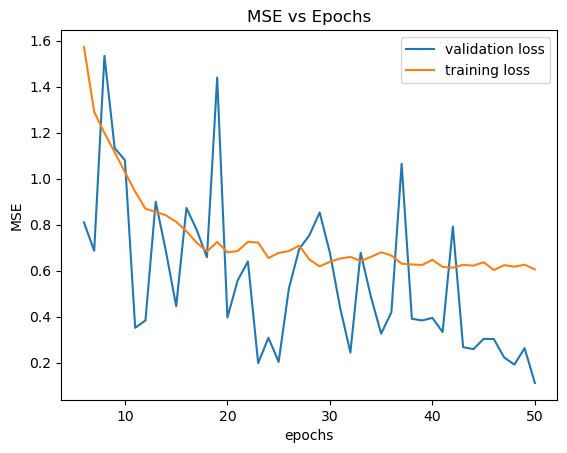

In [10]:
from keras.callbacks import History
history = History()
epoch = [i for i in range(1, 51)]
l1 = losses.history['val_loss']
l2 = losses.history['loss']
plt.plot( epoch[5:],l1[5:] , label='validation loss')
plt.plot(epoch[5:], l2[5:], label='training loss')
plt.title('MSE vs Epochs')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

Getting test data from csv, normalizing it to get test data

In [11]:
# dft = pd.read_csv(r"C:\Users\KEN\test.csv")
# xt = dft['X'].tolist()
# yt = dft['Y'].tolist()
# SINRt = dft['SINR']
# ft1 = normalize(xt, range_to_normalize[0], range_to_normalize[1])
# ft2 = normalize(yt, range_to_normalize[0], range_to_normalize[1])
# ft = []
# for i in range(len(ft1)):
#     ft.append([ft1[i], ft2[i]])
# test = np.array(ft)
# act = SINRt.to_numpy()

dft = pd.read_csv(r"C:\Users\KEN\Documents\SINRt2.csv")
SINRt = dft['SINR']
ISDt = dft['ISD']
act = SINRt.to_numpy()

dt = [405, 405]
theta_t = [2, 15, 36, 55, 75, 102, 119, 125, 147, 155, 174, 205, 213, 236, 255, 295, 311 ,331, 343, 355]

d_tlist = []
theta_tlist = []
for i in dt:
    for j in theta_t:
        d_tlist.append(i)
        theta_tlist.append(math.radians(j))
        
isd_tlist = ISDt.to_list()

ft1 = normalize1(d_tlist, range_to_normalize[0], range_to_normalize[1])
ft2 = normalize2(theta_tlist, range_to_normalize[0], range_to_normalize[1])
ft3 = normalize3(isd_tlist, range_to_normalize[0], range_to_normalize[1])
ft = []
for i in range(len(ft1)):
    ft.append([ft1[i], ft2[i], ft3[i]])
test = np.array(ft)

Obtain predicted data and Measures

In [12]:
pred = model.predict(test)
MSE = mean_squared_error(act,pred)
print("MSE = ",MSE)
R2 = r2_score(pred, act)
print("R2 score = ",R2)

2/2 [==============================] - 0s 3ms/step
MSE =  0.005433516797543105
R2 score =  0.9937237182006057


Plot for ISD = 1150 m for distance = 405 m

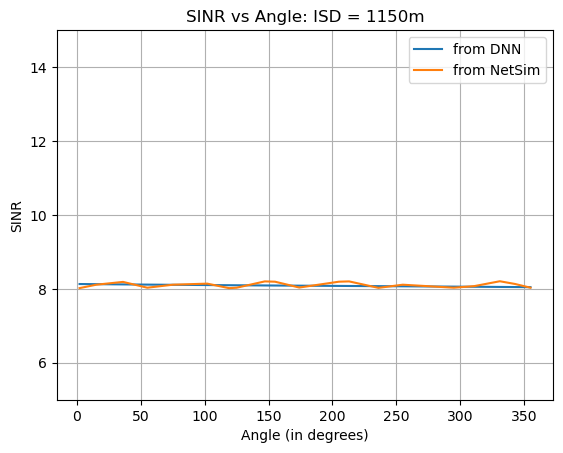

0.006285954875849878
-0.23205740854234125


In [13]:
actual_SINR = list(act)
pred_SINR = list(pred)

plt.plot(theta_t, pred_SINR[:20], label='from DNN')
plt.plot(theta_t, actual_SINR[:20], label='from NetSim')
plt.xlabel('Angle (in degrees)')
plt.ylabel('SINR')
plt.title('SINR vs Angle: ISD = 1150m')
#plt.xticks([2, 15, 36, 55, 75, 102, 119, 125, 147, 155, 174, 205, 213, 236, 255, 295, 311 ,331, 343, 355], rotation=90)
plt.ylim(5, 15)
plt.grid()
plt.legend()
plt.show()

print(mean_squared_error(np.array(actual_SINR[:20]), np.array(pred_SINR[:20])))
print(r2_score(np.array(actual_SINR[:20]), np.array(pred_SINR[:20])))

Plot for ISD = 1250 m for distance = 405 m

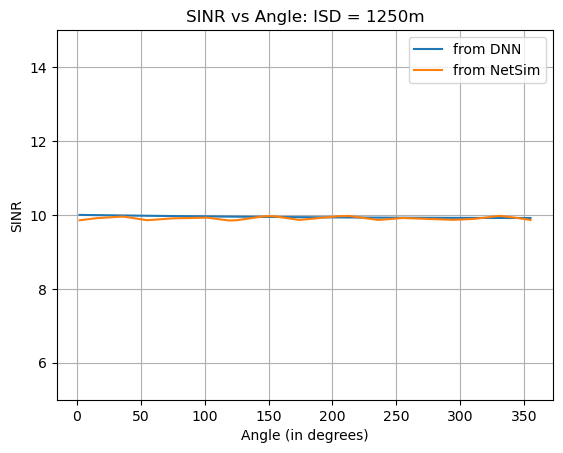

0.004581078719236331
-1.2647500817276507


In [14]:
plt.plot(theta_t, pred_SINR[20:], label='from DNN')
plt.plot(theta_t, actual_SINR[20:], label='from NetSim')
plt.xlabel('Angle (in degrees)')
plt.ylabel('SINR')
plt.title('SINR vs Angle: ISD = 1250m')
#plt.xticks([2, 15, 36, 55, 75, 102, 119, 125, 147, 155, 174, 205, 213, 236, 255, 295, 311 ,331, 343, 355], rotation=90)
plt.ylim(5, 15)
plt.grid()
plt.legend()
plt.show()

print(mean_squared_error(actual_SINR[20:], pred_SINR[20:]))
print(r2_score(actual_SINR[20:], pred_SINR[20:]))

In [15]:
# plt.plot(theta_t, pred_SINR[:36], label='pred')
# plt.plot(theta_t, actual_SINR[:36], label='act')
# plt.xlabel('Angle (in degrees)')
# plt.ylabel('SINR')
# plt.xticks([i for i in range(0, 360, 30)])
# plt.grid()
# plt.legend()
# plt.show()

# print(mean_squared_error(actual_SINR[:36], pred_SINR[:36]))
# print(r2_score(actual_SINR[:36], pred_SINR[:36]))